<a href="https://colab.research.google.com/github/mc-ivan/ml-grupo-3/blob/main/notebook/proyecto_final_grupo_3_ajustado_var_originales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

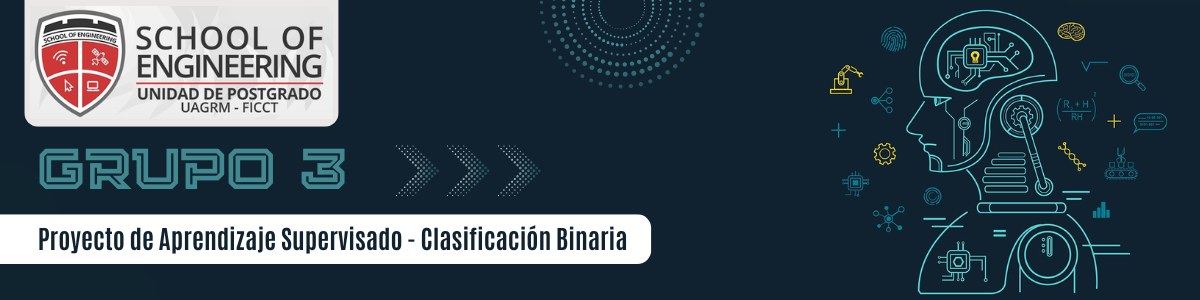

# Proyecto de Aprendizaje Supervisado - Clasificación Binaria

### 🤖 GRUPO 3
👨‍🎓 **Integrantes del equipo:**  
- Karen Torrico
- Karen Huacota
- Jessica Luna
- Elvis Miranda
- Ivan Mamani

---

### ⚙️ Detalles técnicos del proyecto

- **Cantidad de observaciones:** 10,000 filas  
- **Cantidad de variables iniciales:** 66 columnas  
- **Variable objetivo (target):** `OBJ` (binaria)  
- **Variables utilizadas para modelado:** `V1` a `V30` (valores absolutos)  
- **Modelos evaluados:**  
  - Logistic Regression Classifier
  - Support Vector Machine Classifier with RBF Kernel (SVM_RBF).
  - Random Forest Classifier
  - Extreme Gradient Boosting Classifier (XGBoost)
- **Validación:** GridSearchCV con Cross Validation (3 folds)  
- **Métricas evaluadas:** F1-score, AUC, Matriz de Confusión, Curva ROC  


📄 **Informe completo disponible en el archivo [`README.md`](https://github.com/mc-ivan/ml-grupo-3/blob/main/README.md)**  
Incluye justificación de decisiones, análisis exploratorio, limpieza de datos, evaluación de modelos, selección final y conclusiones.

---

# Desarrollo del Proyecto

### 1. Importacion de Librerias

In [1]:
# Librerías para manipulación y carga de datos
import pandas as pd              # Manejo de estructuras de datos (DataFrames)
from zipfile import ZipFile      # Para descomprimir archivos ZIP
import requests                  # Descarga de archivos desde URLs
import io                        # Manejo de flujos de datos en memoria (BytesIO)

# Librerías para análisis de datos y visualización
import numpy as np               # Operaciones numéricas y arrays
import seaborn as sns            # Visualización de datos estadísticos (gráficos de correlación, etc.)
import matplotlib.pyplot as plt  # Visualización de gráficos generales

# Librerías para preprocesamiento y evaluación de modelos
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
# train_test_split → dividir datos en entrenamiento y prueba
# GridSearchCV → búsqueda de hiperparámetros
# StratifiedKFold → validación cruzada respetando balance de clases
# cross_val_score → evaluación de modelos con validación cruzada
from sklearn.preprocessing import StandardScaler  # Normalización o estandarización de variables numéricas

# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier  # Clasificador de Bosques Aleatorios
from sklearn.linear_model import LogisticRegression  # Clasificador de Regresión Logística
from sklearn.svm import SVC
from xgboost import XGBClassifier                    # Clasificador basado en XGBoost (gradient boosting optimizado)

# Métricas de evaluación y visualización de resultados
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
# classification_report → resumen de precisión, recall, F1
# confusion_matrix → matriz de confusión
# roc_auc_score → puntuación AUC
# Displays → gráficos automáticos de matriz de confusión y curva ROC

# Técnicas para balanceo de clases
from imblearn.over_sampling import SMOTE  # Aumento sintético de muestras minoritarias (balance de clases)

### 2. Carga y Preparación Inicial del Dataset

In [2]:
# Descargar el archivo ZIP desde el repositorio de GitHub (URL raw)
zip_url = "https://github.com/mc-ivan/ml-grupo-3/raw/main/dataset/GRUPO%203_1.zip"

response = requests.get(zip_url)
if response.status_code == 200:
    with ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("/content/dataset")
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el CSV extraído desde la carpeta local
csv_path = '/content/dataset/GRUPO 3_1.csv'
df = pd.read_csv(csv_path, sep='|')

# Verificación inicial
print(df.head())
print(df.shape)

      ALEAT         ID OBJ           V1         V2       V3          V4  \
0  0.000008    3032834  SI     0.000000   0.000000  0.00000    0.790010   
1  0.000024  330323800  NO     0.000000   0.000000  0.00000    0.000000   
2  0.000025  270961897  SI     0.000000   0.093916  0.00000  160.044629   
3  0.000044  264138040  NO     0.000000   0.180006  0.00000    0.428190   
4  0.000067    7663508  NO  5830.495244  13.598254  0.43192  671.426908   

            V5        V6        V7  ...     V22_P     V23_P     V24_P  \
0   226.635983  1.493656  0.000000  ...  0.000413  0.039569  0.168177   
1     0.236730  0.000000  0.000000  ...  0.000000  0.047265  0.039317   
2   748.575600  3.053709  0.000000  ...  0.000190  0.364742  0.167146   
3     3.973445  0.037748  0.000000  ...  0.000000  0.133315  0.004763   
4  1229.464863  4.764769  0.014773  ...  0.003644  0.008413  0.047617   

      V25_P  V26_P  V27_P     V28_P     V29_P    V30_P   V31_P.1  
0  0.000000    0.0    0.0  0.000000  0.2410

### 3. Limpieza de Datos

In [3]:
# Inspeccionar todas las columnas
print(df.columns)

Index(['ALEAT', 'ID', 'OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31_P', 'VT', 'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P',
       'V6_P', 'V7_P', 'V8_P', 'V9_P', 'V10_P', 'V11_P', 'V12_P', 'V13_P',
       'V14_P', 'V15_P', 'V16_P', 'V17_P', 'V18_P', 'V19_P', 'V20_P', 'V21_P',
       'V22_P', 'V23_P', 'V24_P', 'V25_P', 'V26_P', 'V27_P', 'V28_P', 'V29_P',
       'V30_P', 'V31_P.1'],
      dtype='object')


In [4]:
# Observando el nombre de las columnas podemos observar que:
# ALEAT, ID -> Muy probablemente identificadores únicos.
# V31_P, V31_P.1 -> No forman parte del bloque V1–V30; sospechosas de ser duplicadas.
# VT -> Sospecha de identificador o columna técnica auxiliar.

# Entonces comprobamos si son identificadores (Si el número de valores únicos es igual al número de filas, mas probable que sea identificador)
for col in ['ALEAT', 'ID', 'VT']:
    if col in df.columns:
        print(col, "→ Valores únicos:", df[col].nunique(), "/", len(df))


ALEAT → Valores únicos: 9999 / 10000
ID → Valores únicos: 10000 / 10000
VT → Valores únicos: 9994 / 10000


In [5]:
# Eliminar columnas irrelevantes es para evitar que el modelo use datos que NO aportan valor predictivo
# (ejemplo: IDs, nombres aleatorios). Podrían introducir ruido o incluso fugas de información.
df = df.drop(columns=['ALEAT', 'ID', 'VT'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31_P', 'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P',
       'V9_P', 'V10_P', 'V11_P', 'V12_P', 'V13_P', 'V14_P', 'V15_P', 'V16_P',
       'V17_P', 'V18_P', 'V19_P', 'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P',
       'V25_P', 'V26_P', 'V27_P', 'V28_P', 'V29_P', 'V30_P', 'V31_P.1'],
      dtype='object')


In [6]:
# Comprobamos que si 'V31_P' y 'V31_P.1' son columnas vacías, residuales o con valor constante
for col in ['V31_P', 'V31_P.1']:
    if col in df.columns:
        print(col)
        print("Valores únicos:", df[col].nunique())
        print("Porcentaje de nulos:", df[col].isnull().mean())
        print(df[col].value_counts(dropna=False).head())

V31_P
Valores únicos: 9505
Porcentaje de nulos: 0.0
V31_P
0.000000     494
0.007360       2
72.433643      2
6.870077       1
2.673810       1
Name: count, dtype: int64
V31_P.1
Valores únicos: 6160
Porcentaje de nulos: 0.0
V31_P.1
0.000000    494
0.000171      8
0.000015      8
0.000086      8
0.000059      7
Name: count, dtype: int64


In [7]:
# Al parecer son columnas con ruido técnico o residuos de alguna operación matemática.
# El hecho de que ambas tengan exactamente el mismo número de veces 0.000000 sugiere una relación con la misma variable de origen.
# No aportan valor predictivo directo para un modelo tipo RandomForest o similar.
# Ademas no corresponden al rango de variables V1-V30 mencionado en el proyecto

# Se procede a eliminarlos
df = df.drop(columns=['V31_P', 'V31_P.1'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P', 'V9_P',
       'V10_P', 'V11_P', 'V12_P', 'V13_P', 'V14_P', 'V15_P', 'V16_P', 'V17_P',
       'V18_P', 'V19_P', 'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P', 'V25_P',
       'V26_P', 'V27_P', 'V28_P', 'V29_P', 'V30_P'],
      dtype='object')


In [8]:
# Revisar valores únicos por columna
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Columna constante o sin variación: {col}")

Columna constante o sin variación: V14
Columna constante o sin variación: V14_P


In [9]:
# Las columnas V14 y V14_P tienen exactamente el mismo valor en todas las filas.
# No aportan ninguna información útil al modelo, porque no contribuyen a diferenciar clases.
df = df.drop(columns=['V14', 'V14_P'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V1_P',
       'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P', 'V9_P', 'V10_P',
       'V11_P', 'V12_P', 'V13_P', 'V15_P', 'V16_P', 'V17_P', 'V18_P', 'V19_P',
       'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P', 'V25_P', 'V26_P', 'V27_P',
       'V28_P', 'V29_P', 'V30_P'],
      dtype='object')


In [10]:
# Verificar si tenemos datos nulos
print(df.isnull().mean().sort_values(ascending=False))

OBJ      0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
V29      0.0
V30      0.0
V1_P     0.0
V2_P     0.0
V3_P     0.0
V4_P     0.0
V5_P     0.0
V6_P     0.0
V7_P     0.0
V8_P     0.0
V9_P     0.0
V10_P    0.0
V11_P    0.0
V12_P    0.0
V13_P    0.0
V15_P    0.0
V16_P    0.0
V17_P    0.0
V18_P    0.0
V19_P    0.0
V20_P    0.0
V21_P    0.0
V22_P    0.0
V23_P    0.0
V24_P    0.0
V25_P    0.0
V26_P    0.0
V27_P    0.0
V28_P    0.0
V29_P    0.0
V30_P    0.0
dtype: float64


In [11]:
# Al parecer nuestro DataFrame no tiene valores nulos en ninguna de las columnas que quedan.
# Por lo tanto, no necesitamos aplicar imputación ni eliminar filas o columnas por valores faltantes en este punto.
df.shape

(10000, 59)

### 4. Definición de variables a utilizar

In [12]:
variables_originales = [f'V{i}' for i in range(1, 31) if i != 14]
variables_relativas = [f'V{i}_P' for i in range(1, 31) if i != 14]

# Para este ejercicio, se opta por usar las variables absolutas (originales)
X = df[variables_originales]
y = df['OBJ'].map({'NO': 0, 'SI': 1})  # Conversión binaria

### Exploración previa

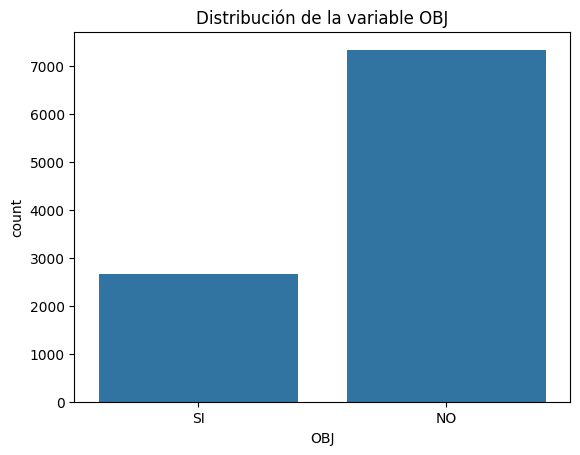

In [13]:
# Distribución de la variable OBJ
sns.countplot(x=y.map({0: 'NO', 1: 'SI'}))
plt.title('Distribución de la variable OBJ')
plt.show()

In [ ]:
# Interpretación:
# Se observa un desbalance entre clases: ~27% SI (1) vs ~73% NO (0).
# Relevante para ajustar balance de clases en el modelado.

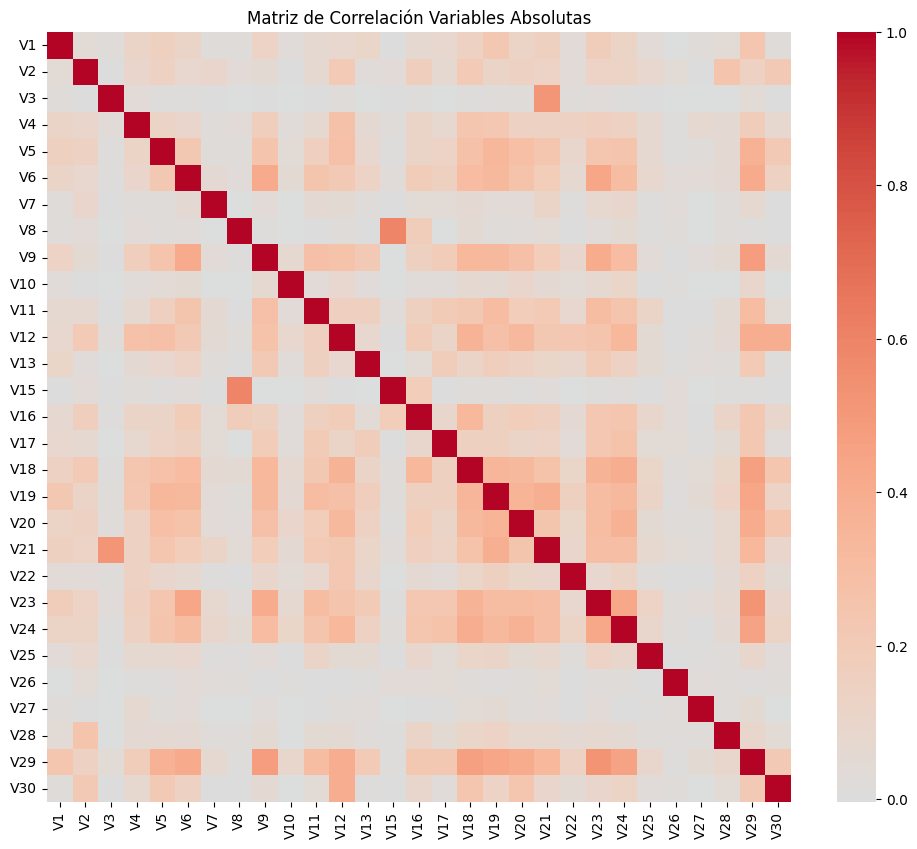

In [14]:
#Correlación entre Variables
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlación Variables Absolutas')
plt.show()

In [ ]:
# Interpretación:
# La matriz de correlación muestra relaciones débiles entre la mayoría de variables.
# No se identifican variables altamente redundantes o colineales.

### 5. División de datos y normalización

In [15]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Balanceo de Clases con SMOTE

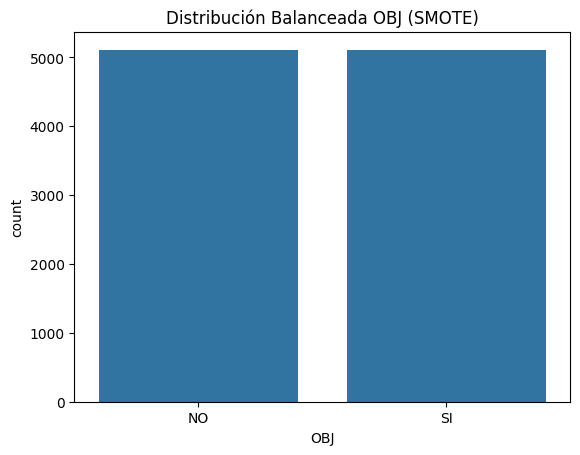

In [16]:
# Aplicamos la técnica SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_balanced.map({0: 'NO', 1: 'SI'}))
plt.title('Distribución Balanceada OBJ (SMOTE)')
plt.show()

In [ ]:
# Interpretación:
# Ahora ambas clases (SI y NO) cuentan con 5000 registros en el set de entrenamiento.
# Esto ayuda a evitar que el modelo favorezca la clase mayoritaria y mejora las métricas de evaluación.

### 6. Definición de Modelos y Búsqueda de Hiperparámetros con GridSearchCV

In [ ]:
# Definimos un diccionario con los modelos y los rangos de hiperparámetros para probar en GridSearchCV
# Sin balanceo
# modelos = {
#     'LogisticRegression': {
#         'model': LogisticRegression(max_iter=5000),
#         'params': {'C': [0.01, 0.1, 1, 10]}
#     },
#     'RandomForest': {
#         'model': RandomForestClassifier(random_state=42),
#         'params': {'n_estimators': [100, 150], 'max_depth': [5, 10, None]}
#     },
#     'SVM_RBF': {
#         'model': SVC(kernel='rbf', probability=True),
#         'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
#     }
# }

In [17]:
# Definimos un diccionario con los modelos y los rangos de hiperparámetros para probar en GridSearchCV
# Incluyendo balanceo de clases para abordar el desbalance detectado en el análisis preliminar
modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000, class_weight='balanced'),  # Ajuste de pesos automáticos para clases desbalanceadas
        'params': {
            'C': [0.01, 0.1, 1, 10]  # Parámetro de regularización (controla sobreajuste)
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 150],         # Número de árboles en el bosque
            'max_depth': [5, 10, 15],               # Profundidad máxima de cada árbol
            'min_samples_split': [2, 5, 10],        # Mínimo de muestras requeridas para dividir un nodo
            'min_samples_leaf': [1, 3, 5]           # Mínimo de muestras requeridas en una hoja
        }
    },
    'SVM_RBF': {
        'model': SVC(kernel='rbf', probability=True, class_weight='balanced'),  # SVM con kernel radial, soporta probabilidad
        'params': {
            'C': [0.1, 1, 10],                      # Parámetro de regularización
            'gamma': ['scale', 0.01, 0.001]         # Controla la forma de la frontera de decisión
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # XGBoost sin warnings de encoder
        'params': {
            'n_estimators': [100, 150],             # Número de árboles
            'max_depth': [3, 5, 7],                 # Profundidad máxima
            'scale_pos_weight': [1, 2, 5]           # Peso relativo para la clase positiva
        }
    }
}

In [18]:
# Diccionario para almacenar resultados de cada modelo
resultados = {}

# Definimos la validación cruzada estratificada con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre cada modelo definido en el diccionario
for nombre, m in modelos.items():
    # Configuramos GridSearchCV con los hiperparámetros y validación cruzada
    grid = GridSearchCV(
        estimator=m['model'],
        param_grid=m['params'],
        cv=cv,
        scoring='f1',    # Se utiliza F1-score como métrica de evaluación
        n_jobs=-1        # Usa todos los núcleos disponibles para acelerar el proceso
    )

    # Entrenamos el modelo buscando la mejor combinación de hiperparámetros
    grid.fit(X_train, y_train)

    # Guardamos el mejor modelo y sus parámetros para análisis posterior
    resultados[nombre] = {
        'mejor_modelo': grid.best_estimator_,
        'mejores_parametros': grid.best_params_,
        'mejor_score_cv': grid.best_score_
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:38:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# Mostrar resumen de resultados para cada modelo después de GridSearchCV
# for nombre, resultado in resultados.items():
#     print(f"Modelo: {nombre}")
#     print(f"Mejores parámetros: {resultado['mejores_parametros']}")
#     print(f"Mejor F1-score (CrossVal): {resultado['mejor_score_cv']:.4f}")
#     print("-" * 100)

In [ ]:
# Interpretación
# El modelo SVM con kernel RBF obtuvo el mejor desempeño según F1-score promedio.
# RandomForest y XGBoost tuvieron resultados competitivos, mientras que LogisticRegression mostró el desempeño más bajo.
# La selección de hiperparámetros reflejó un equilibrio entre ajuste del modelo y control de sobreajuste,
# priorizando modelos más simples en lugar de configuraciones demasiado complejas.

### 7. Evaluación Inicial con Validación Cruzada

In [20]:

# cv_scores = cross_val_score(modelos['RandomForest']['model'], X, y, cv=3, scoring='f1')
# print("Scores para CrossValidation, 3 Folds:", cv_scores)
# print('Score Promedio para CrossValidation, 3 Folds: {:.3f}'.format(np.mean(cv_scores)))

# Seleccionamos el modelo RandomForest previamente configurado en el diccionario de modelos
model_rf = modelos['RandomForest']['model']

# Aplicamos validación cruzada (Cross Validation) con 3 particiones (folds)
# cross_val_score entrena y evalúa el modelo en 3 ciclos diferentes para estimar su rendimiento promedio
cv_scores = cross_val_score(
    model_rf,       # Modelo de RandomForest con balanceo de clases configurado
    X,              # Variables independientes
    y,              # Variable objetivo (OBJ)
    cv=3,           # Número de folds en la validación cruzada
    scoring='f1'    # Métrica utilizada: F1-score (importante por el desbalance de clases)
)

# Mostramos los F1-score obtenidos en cada uno de los 3 folds
print("CrossVal F1 con pesos balanceados:", cv_scores)

# Calculamos y mostramos el promedio de los F1-score
print("Promedio:", np.mean(cv_scores))

CrossVal F1 con pesos balanceados: [0.07090719 0.05514316 0.07407407]
Promedio: 0.06670814306537125


In [21]:
# check Important features
model_rf.fit(X_train, y_train)

# Creamos un DataFrame para visualizar las importancias de cada variable (feature)
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model_rf.feature_importances_}
).sort_values("importance", ascending=False)

# Mostramos el DataFrame resultante para analizar qué variables aportan más al modelo
feature_importances_df

,feature,importance
17,V19,0.056498
22,V24,0.056129
21,V23,0.052274
8,V9,0.052164
19,V21,0.051721
27,V29,0.050967
16,V18,0.050201
14,V16,0.049859
4,V5,0.049777
11,V12,0.049561


### 8. Evaluación final


Modelo: LogisticRegression
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      2225
           1       0.29      0.52      0.37       775

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.51      3000
weighted avg       0.64      0.54      0.57      3000

AUC: 0.5631408481333816


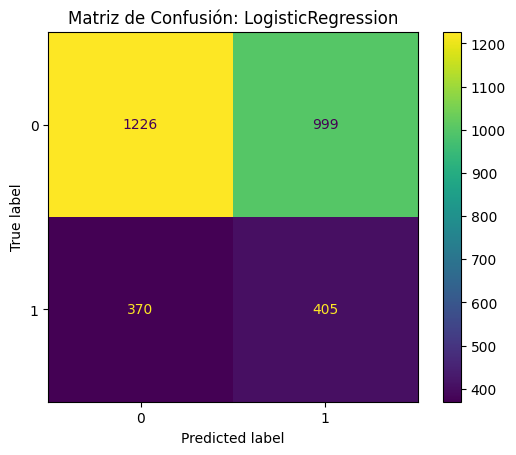

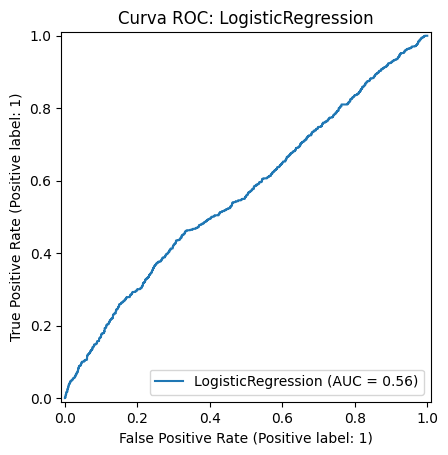


Modelo: RandomForest
Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      2225
           1       0.34      0.58      0.43       775

    accuracy                           0.60      3000
   macro avg       0.57      0.60      0.56      3000
weighted avg       0.69      0.60      0.63      3000

AUC: 0.6215562160202972


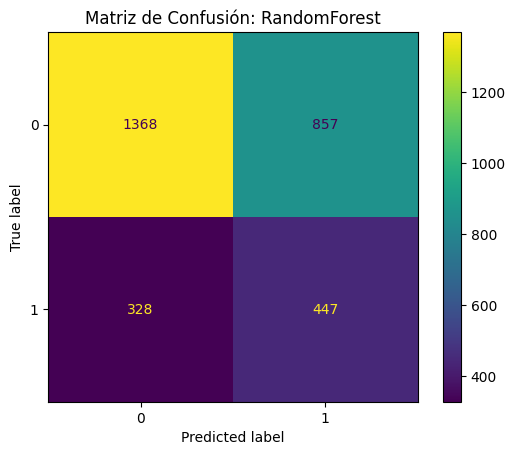

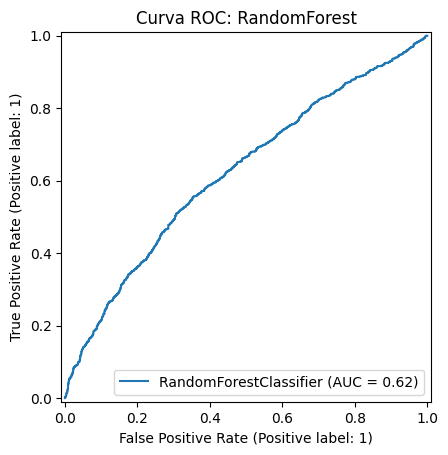


Modelo: SVM_RBF
Mejores parámetros: {'C': 0.1, 'gamma': 0.001}
              precision    recall  f1-score   support

           0       0.84      0.07      0.13      2225
           1       0.26      0.96      0.42       775

    accuracy                           0.30      3000
   macro avg       0.55      0.52      0.27      3000
weighted avg       0.69      0.30      0.20      3000

AUC: 0.5240782892352301


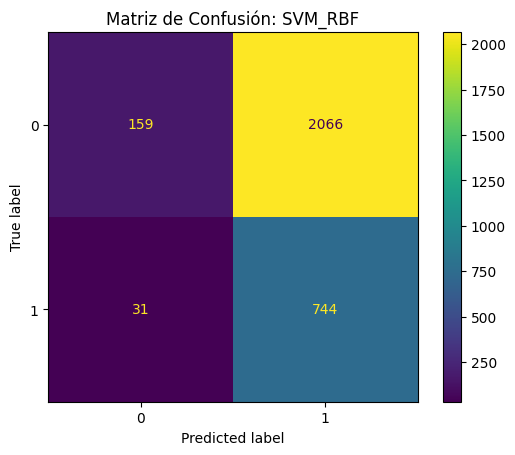

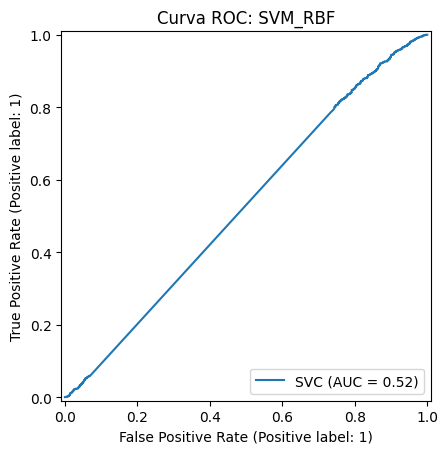


Modelo: XGBoost
Mejores parámetros: {'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
              precision    recall  f1-score   support

           0       0.79      0.34      0.48      2225
           1       0.28      0.74      0.41       775

    accuracy                           0.45      3000
   macro avg       0.54      0.54      0.44      3000
weighted avg       0.66      0.45      0.46      3000

AUC: 0.5960049293222183


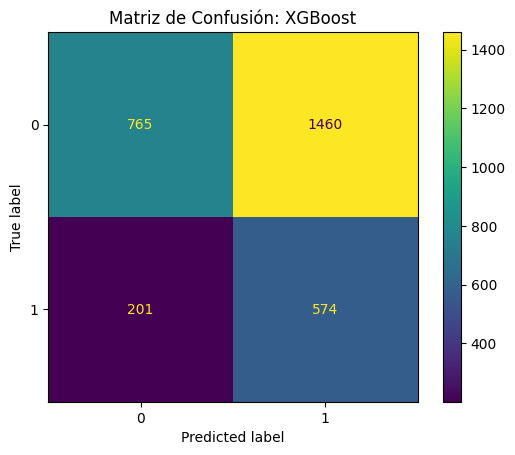

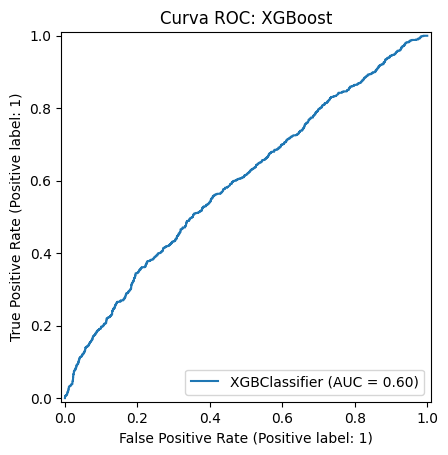

In [22]:
# Iteramos sobre cada modelo almacenado en el diccionario de resultados
for nombre, resultado in resultados.items():
    # Generamos las predicciones usando el modelo ya entrenado con los mejores parámetros encontrados
    y_pred = resultado['mejor_modelo'].predict(X_test)
    print(f"\nModelo: {nombre}")
    print(f"Mejores parámetros: {resultado['mejores_parametros']}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, resultado['mejor_modelo'].predict_proba(X_test)[:,1])}")

    # Graficamos la matriz de confusión para visualizar cuántos aciertos y errores tuvo el modelo por clase
    ConfusionMatrixDisplay.from_estimator(resultado['mejor_modelo'], X_test, y_test)
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.show()

    # Graficamos la curva ROC, que muestra la relación entre tasa de verdaderos positivos vs falsos positivos
    RocCurveDisplay.from_estimator(resultado['mejor_modelo'], X_test, y_test)
    plt.title(f'Curva ROC: {nombre}')
    plt.show()

### 9. Conclusión

Tras evaluar varios modelos de clasificación (Logistic Regression, Random Forest, SVM y XGBoost), **Random Forest** ha demostrado ser el más equilibrado y efectivo en nuestro caso, con el mejor rendimiento en términos de **F1-score** y **AUC**. Aunque los modelos como SVM y XGBoost mostraron buenos resultados en algunas métricas, **Random Forest** sobresale por su capacidad para manejar el desbalance de clases y su estabilidad general.

Por lo tanto, **Random Forest** se recomienda como el modelo final para la clasificación de la variable `OBJ` en este conjunto de datos.